![](https://drive.google.com/uc?export=view&id=15TMjr_no10HhK4GYzbz4aAn924A39sL_)

In [ ]:
#@title Librerias
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import *

In [ ]:
#@title Descarga del dataset
!pip install pandas-profiling
# !gdown --id 1Eea4lMGZlSxlrCCAJnyIVtv-w5Zik3-A
!gdown --id 1WnurLFViF-Axx6vygXGTlc0z-TKT80-V
import pandas as pd
# D=pd.read_csv('water_potability.csv')
D=pd.read_excel('DATA.xlsx')
from google.colab import data_table
data_table.enable_dataframe_formatter()
from IPython.display import clear_output
clear_output()
d=D.drop(columns=['Año','NombreDepartamento','NombreMunicipio','Divi_muni'])
Ds=D.loc[D['NombreDepartamento']=='Santander']
ds=Ds.drop(columns=['Año','NombreDepartamento','NombreMunicipio','Divi_muni'])
Dc = D.copy()
Dc["Riesgo"] = ""
def calidad(irca):
  if irca >= 0 and irca <= 5:
    return "Sin riesgo"
  elif irca >= 5.1 and irca <=14:
    return "Riesgo Bajo"
  elif irca >= 14.1 and irca <= 35:
    return "Riesgo Medio"
  elif irca >= 35.1 and irca <= 80:
    return "Riesgo Alto"
  elif irca >= 80.1:
    return "Inviable"
  
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s
def reducir(x):
  if x > 100:
    return 100
  else:
    return x

Dc["IrcaPromedio"] = Dc["IrcaPromedio"].apply(reducir)
Dc["Riesgo"] = Dc["IrcaPromedio"].apply(calidad)
Dc["NombreMunicipio"] = Dc["NombreMunicipio"].apply(normalize)
Dc["NombreMunicipio"] = Dc["NombreMunicipio"].str.upper()
Dc["NombreDepartamento"] = Dc["NombreDepartamento"].apply(normalize)
Dc["NombreDepartamento"] = Dc["NombreDepartamento"].str.upper()
Dcs=Dc[Dc['NombreDepartamento']=='SANTANDER'].copy()
D

IrcaPromedio   Año NombreDepartamento       NombreMunicipio  Divi_muni  \
0             0.00  2010            Córdoba              Montería      23001   
1            30.48  2010           Guaviare            El Retorno      95025   
2             0.40  2010          Santander                Cepitá      68160   
3             8.32  2010              Sucre                Ovejas      70508   
4            37.14  2010            Vichada         Santa Rosalía      99624   
...            ...   ...                ...                   ...        ...   
7258          2.43  2019          Antioquia             Arboletes       5051   
7259          0.54  2019          Antioquia              Apartadó       5045   
7260          0.00  2019          Antioquia  Santafé De Antioquia       5042   
7261          2.43  2019          Antioquia                 Andes       5034   
7262          3.81  2019          Antioquia                 Amagá       5030   

      Alcanilidad Total  Cloro residual libre  Coliformes totales  \
0                 25.73                  0.99                0.00   
1                  4.27                  0.28                0.75   
2                 32.83                  1.18                0.00   
3                219.81                  1.45                0.12   
4                  4.88                  0.09              696.50   
...                 ...                   ...                 ...   
7258              58.53                  1.04                1.82   
7259             129.59                  1.11                0.00   
7260              77.90                  1.38                0.00   
7261               9.35                  1.57                0.00   
7262              28.46                  0.96                0.20   

      Color aparente  Dureza total  E.coli    ph  Turbiedad  
0               2.66         35.77    0.00  6.90       0.81  
1              16.67          5.47    0.25  6.51       4.82  
2               3.83        134.33    0.00  7.63       0.51  
3               4.19         23.10    0.00  8.86       0.35  
4               2.88         13.30   20.73  6.08       9.32  
...              ...           ...     ...   ...        ...  
7258            5.04        106.88    0.00  7.00       0.51  
7259            3.67        140.47    0.00  8.14       0.53  
7260            3.68         92.48    0.00  7.77       0.31  
7261            3.22         14.40    0.00  6.98       0.49  
7262            3.33         27.24    0.06  7.03       0.46  

[7263 rows x 13 columns]

# Gráficas

In [ ]:
#@title **2. Correlación a nivel nacional**
import warnings
warnings.filterwarnings('ignore')
d.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [ ]:
#@title **2. Correlación en Santander**
import warnings
warnings.filterwarnings('ignore')
ds.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

In [ ]:
#@title Mapa Regional del Indice de Riesgo
#@markdown En este mapa se puede distinguir fácilmente los distintos departamentos que tienen una calidad de agua deplorable por medio del color que poseen.
#@markdown Entonces, podemos determinar que las siguientes regiones tendrían una clasificación alta en IRCA: 
#@markdown - La Guajira 
#@markdown - Putumayo 
#@markdown - Cauca 
#@markdown - Caldas
#@markdown - Norte de Santander 

#@markdown Esto nos permitiría inferir que el gobierno no ha tomado las medidas adecuadas para solucionar un problema tan grave como la mala calidad del agua en dichos departamentos.

#@markdown En otros casos, territorios como Santander, Vichada, Boyacá y Guaviare, no presentan una calidad del agua tan nociva como los departamentos mencionados anteriormente, sino que en cambio, tienen dicho recurso hídrico en muy buen estado.
!pip install -U plotly
clear_output()
import pandas as pd
import requests
import plotly.express as px
import json
Dn = D.copy()
Dn["Riesgo"] = ""
def calidad(irca):
  if irca == 0:
    return 0
  elif irca > 0 and irca <= 5:
    return 1
  elif irca >= 5.1 and irca <=14:
    return 2
  elif irca >= 14.1 and irca <= 35:
    return 3
  elif irca >= 35.1 and irca <= 80:
    return 4
  elif irca >= 80.1:
    return 5
  
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s
def reducir(x):
  if x > 100:
    return 100
  else:
    return x

Dn["IrcaPromedio"] = Dn["IrcaPromedio"].apply(reducir)
Dn["Riesgo"] = Dn["IrcaPromedio"].apply(calidad)
Dn["NombreMunicipio"] = Dn["NombreMunicipio"].apply(normalize)
Dn["NombreMunicipio"] = Dn["NombreMunicipio"].str.upper()
Dn["NombreDepartamento"] = Dn["NombreDepartamento"].apply(normalize)
Dn["NombreDepartamento"] = Dn["NombreDepartamento"].str.upper()

dmap = {'NombreDepartamento': Dn.NombreDepartamento.unique(), 'MediadeRiesgo': np.around(Dn.groupby("NombreDepartamento")["Riesgo"].agg("mean").values)}
dfmap = pd.DataFrame(data=dmap)
repo_url = 'https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json' #Archivo GeoJSON
co_regions_geo = requests.get(repo_url).json()

fig = px.choropleth(data_frame=dfmap, 
                    geojson=co_regions_geo, 
                    locations='NombreDepartamento', # nombre de la columna del Dataframe
                    featureidkey='properties.NOMBRE_DPT',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='MediadeRiesgo', #El color depende de las cantidades
                    color_continuous_scale="burg",
                    # scope='south america'
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="geojson")

fig.update_layout(
    title_text = 'Riesgo de consumo',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
    height=1000
)

fig.show()

## Análisis a nivel nacional

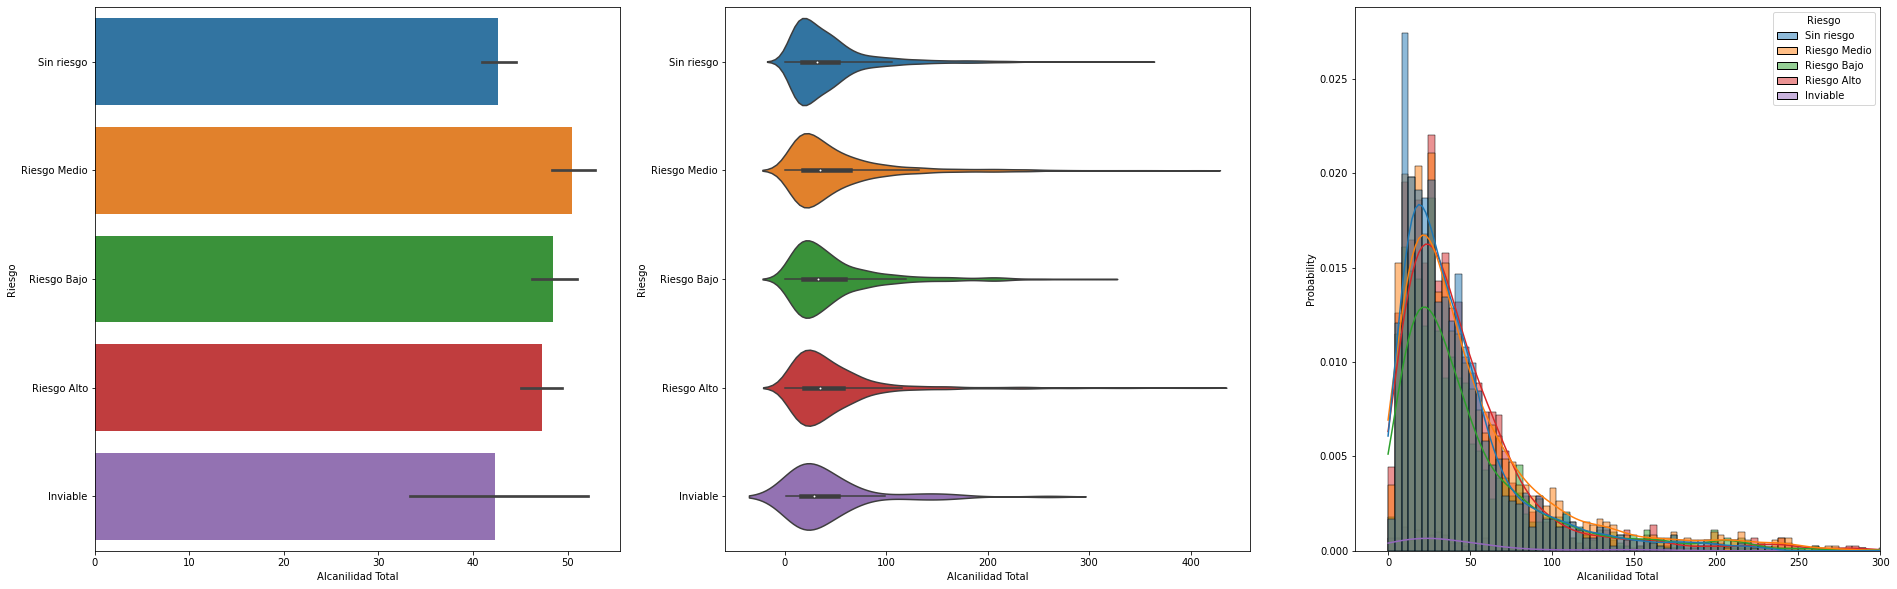

In [ ]:
#@title Análisis de la importancia de la Alcalinidad en la calidad del agua
#@markdown Como se puede apreciar a nivel nacional la alcanilidad es un factor poco importante a la hora de determinar la calidad del agua dado que este se encuentra casi en igual proporcion en todos rangos de calidad. Su valor de correlación es muy bajo y es exactamente -0.073.
plt.figure(figsize=(32,10))
x='Alcanilidad Total'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
# g.set(xlim=(-2, 20))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(-20, 300))
plt.show()

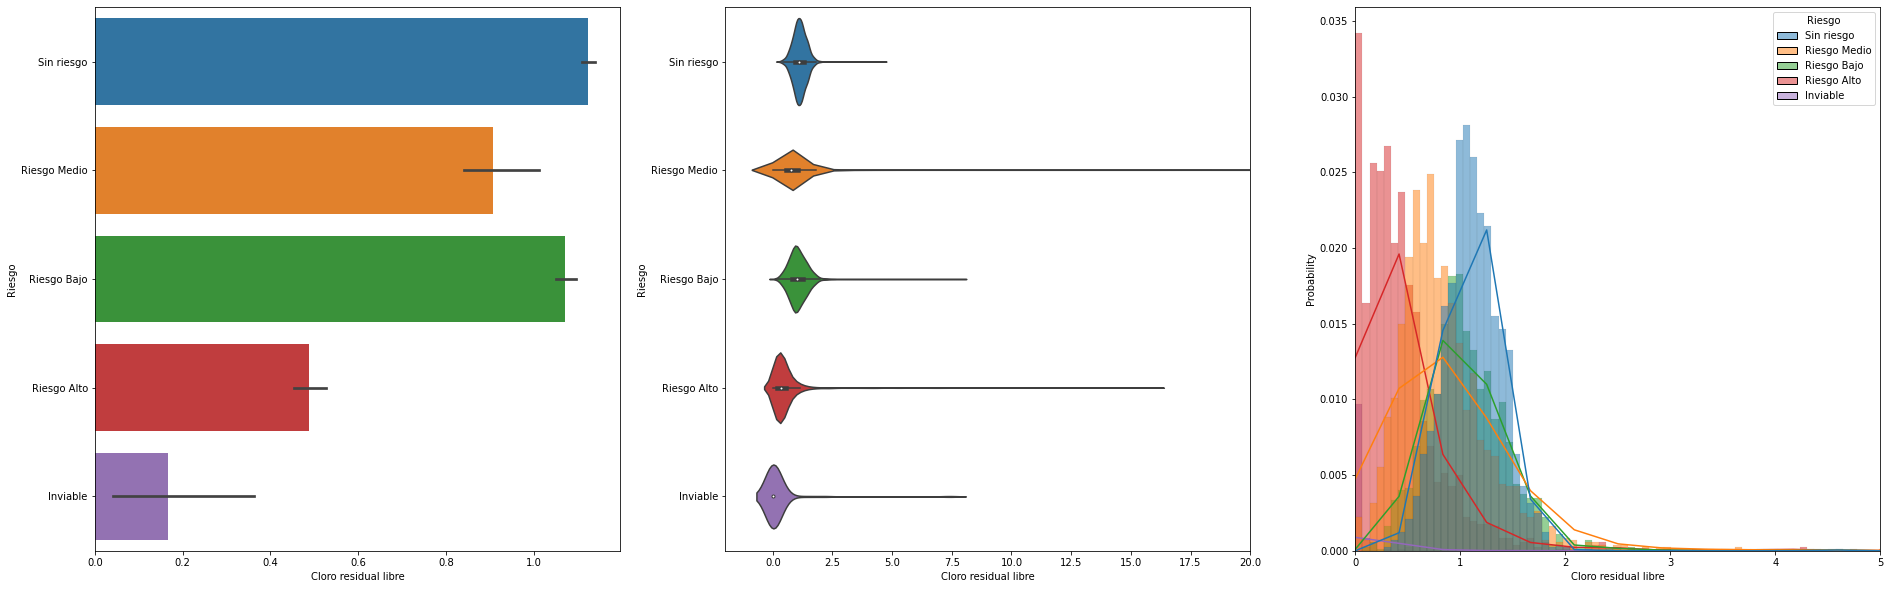

In [ ]:
#@title Análisis de la importancia del Cloro en la calidad del agua
#@markdown Como se puede visualizar en las tablas, los riesgos parecen no verse afectados por la cantidad de cloro que haya en la muestra de agua, esto incluso se puede confirmar aún más teniendo en cuenta que la correlación con el IRCA es de -0.231.
plt.figure(figsize=(32,10))
x='Cloro residual libre'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-2, 20))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 5))
plt.show()

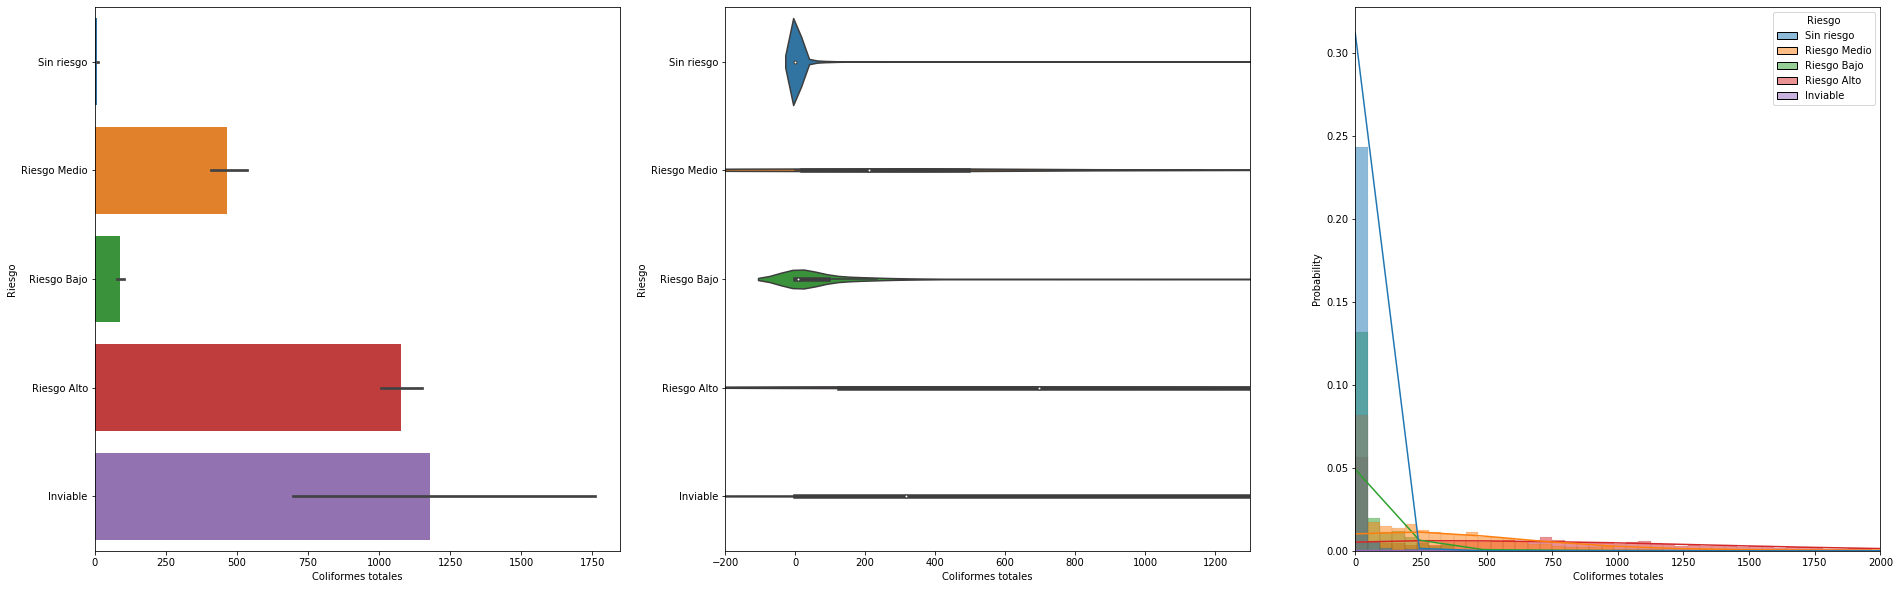

In [ ]:
#@title Análisis de la importancia de los Coliformes en la calidad del agua
#@markdown En el país los resultados de las muestras de agua que presentan bacterias Coliformes muestra estar entre riesgo medio y sin riesgo, sin embargo, se debe tener en cuenta que los datos también tienen ciertas anomalías que los hace llegar a ganar un riesgo alto o incluso a ser inviables, esto se puede explicar por la correlación que es de 0.366, un factor de alta importancia para determinar el IRCA.
plt.figure(figsize=(32,10))
x='Coliformes totales'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-200, 1300))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 2000))
plt.show()

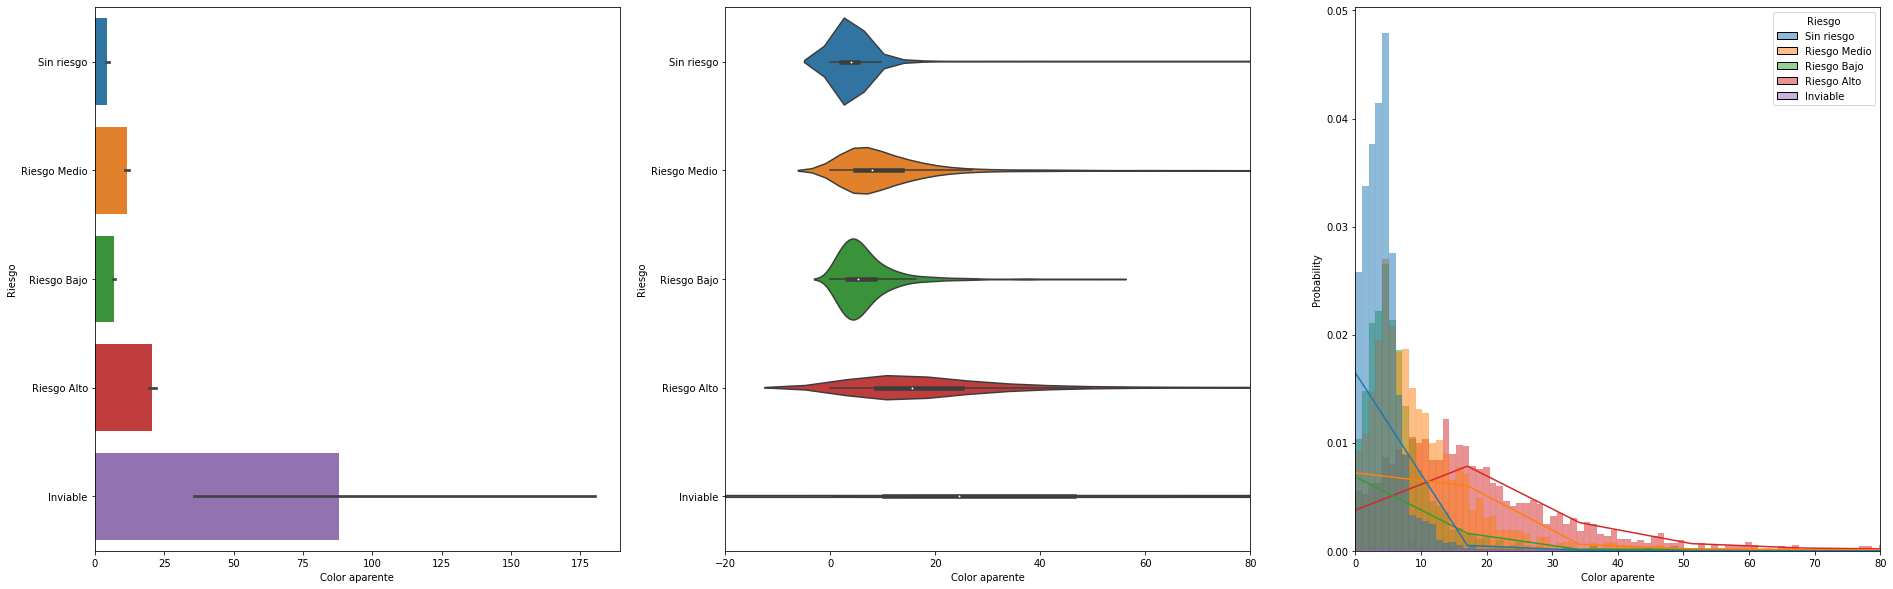

In [ ]:
#@title Análisis de la importancia del Color aparente en la calidad del agua
#@markdown El color se determina por las sustancias disueltas en el agua, sabiendo esto, entre más se aleje al color natural del agua posiblemente indique un calidad de agua totalmente deplorable, es por eso, que tiene una correlación de 0.209, por que puede ser un componente clave a la hora de determinar el IRCA.
plt.figure(figsize=(32,10))
x='Color aparente'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-20, 80))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 80))
plt.show()

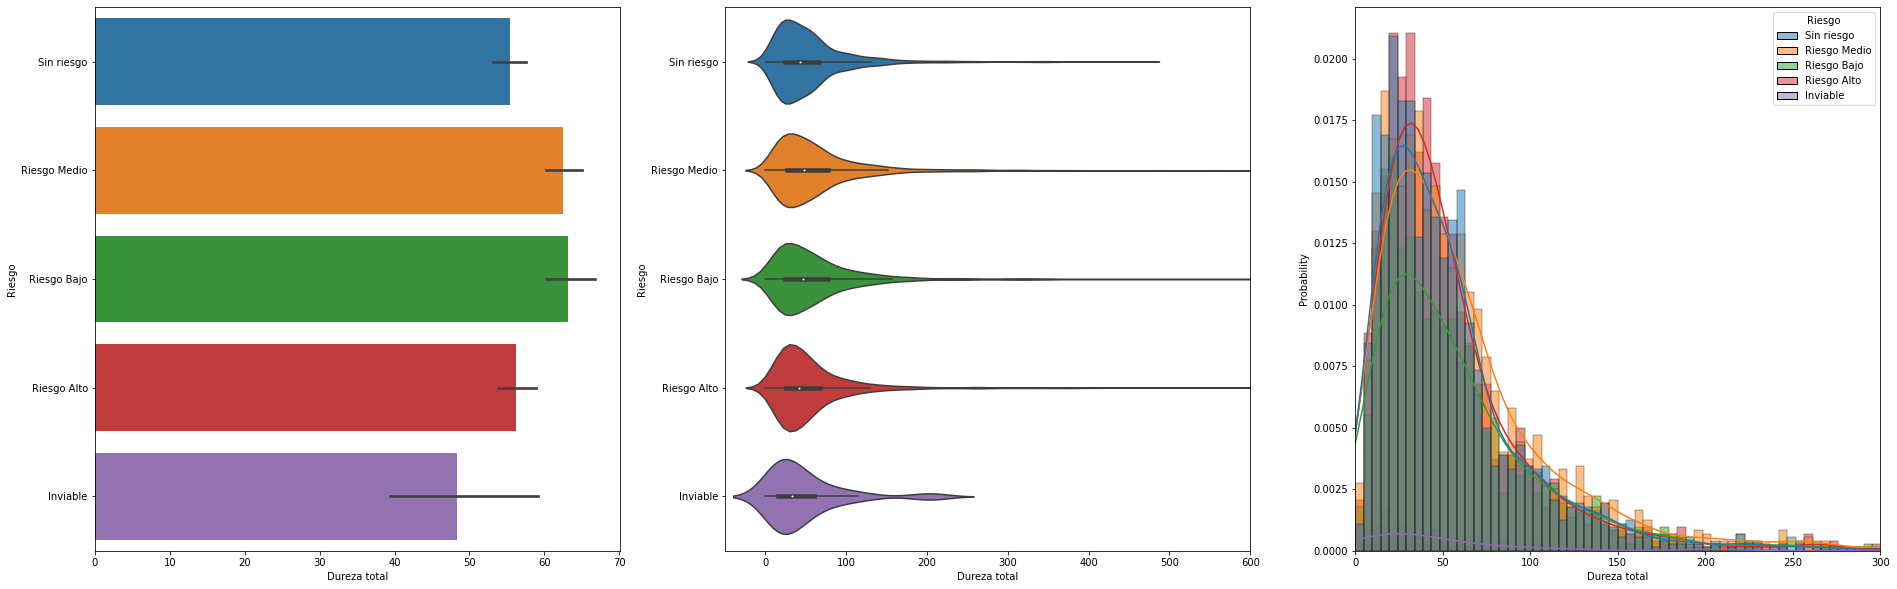

In [ ]:
#@title Análisis de la importancia de la Dureza total en la calidad del agua
#@markdown Con el tema de la dureza, esto se refiere a la concentración de minerales en el agua, que puede llegar a ser muy altos pero que al final de cuentas no necesariamente debe producir un efecto adverso a la hora de consumirlos, por eso la correlación es tan baja  0.019 y eso también explicaría por que las tablas graficadas tienen valores similares.
plt.figure(figsize=(32,10))
x='Dureza total'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-50, 600))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 300))
plt.show()

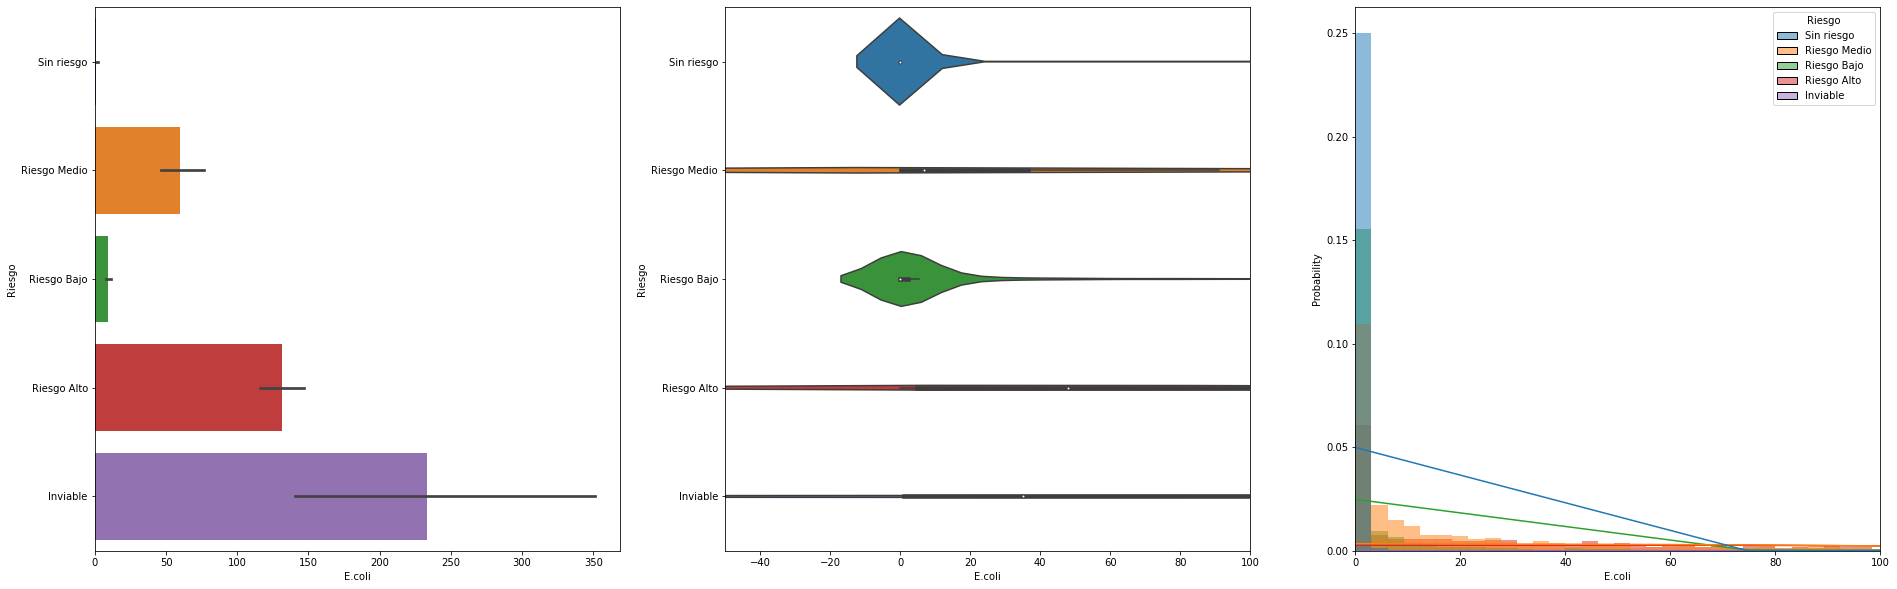

In [ ]:
#@title Análisis de la importancia del E.coli en la calidad del agua
#@markdown Según la información de las tablas se puede inferir que la bacteria Escherichia Coli es un factor a tener en cuenta sobre la calidad de agua, después de todo, se puede visualizar que altas cantidades de estas bacterias pueden significar un riesgo totalmente alto y efectivamente, la correlación que presenta con el índice de riesgo de la calidad del agua es de 0.226, que la coloca en la cuarta posición de las características que más alteraciones generan.
plt.figure(figsize=(32,10))
x='E.coli'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-50, 100))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 100))
plt.show()

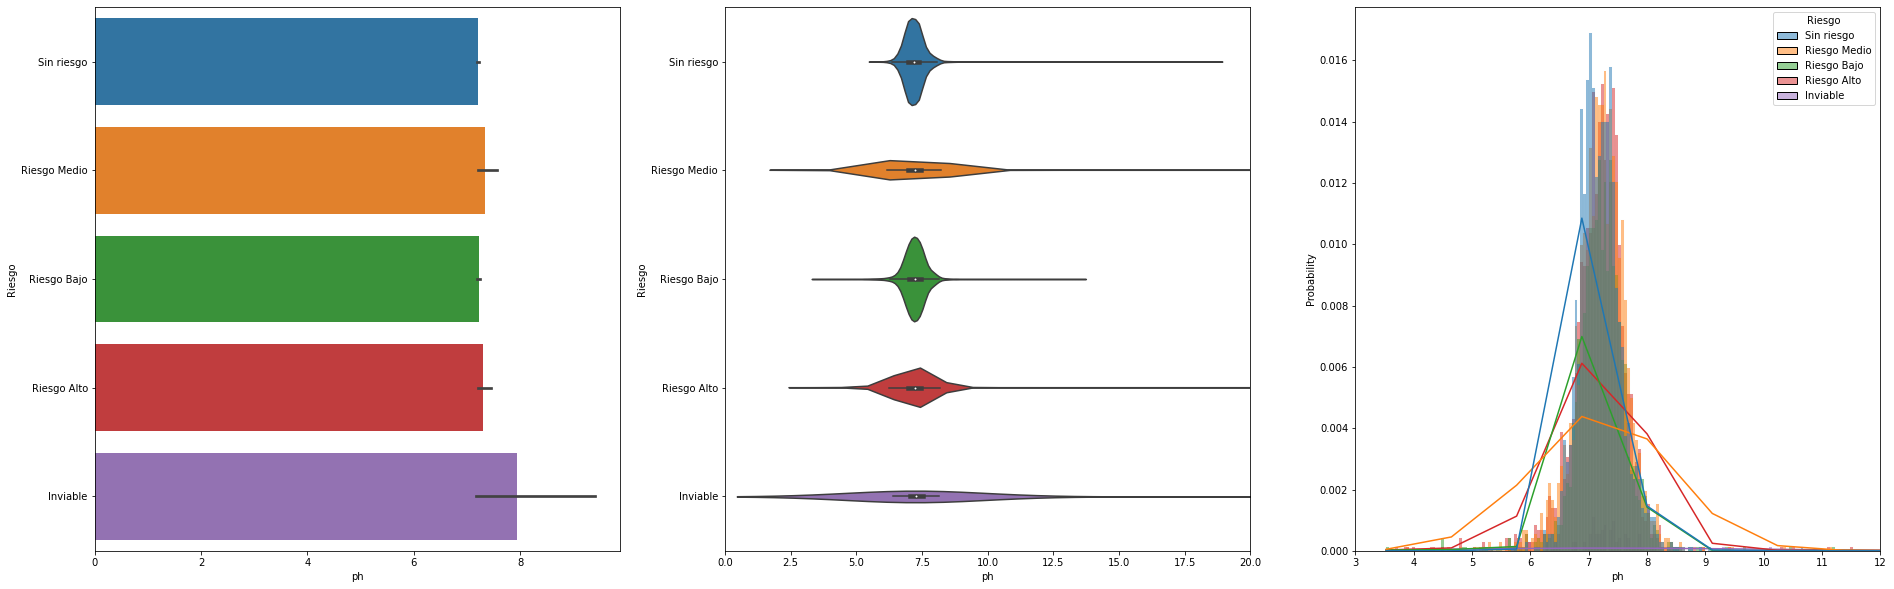

In [ ]:
#@title Análisis de la importancia del ph en la calidad del agua
#@markdown El ph no es un factor de alta importancia como se puede evidenciar gráficamente o en su correlación que es de tan solo 0.021, esto puede deberse a que el agua no apunta al extremo inferior en la escala de ph, es decir, extremadamente ácida.
plt.figure(figsize=(32,10))
x='ph'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(0, 20))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(3, 12))
plt.show()

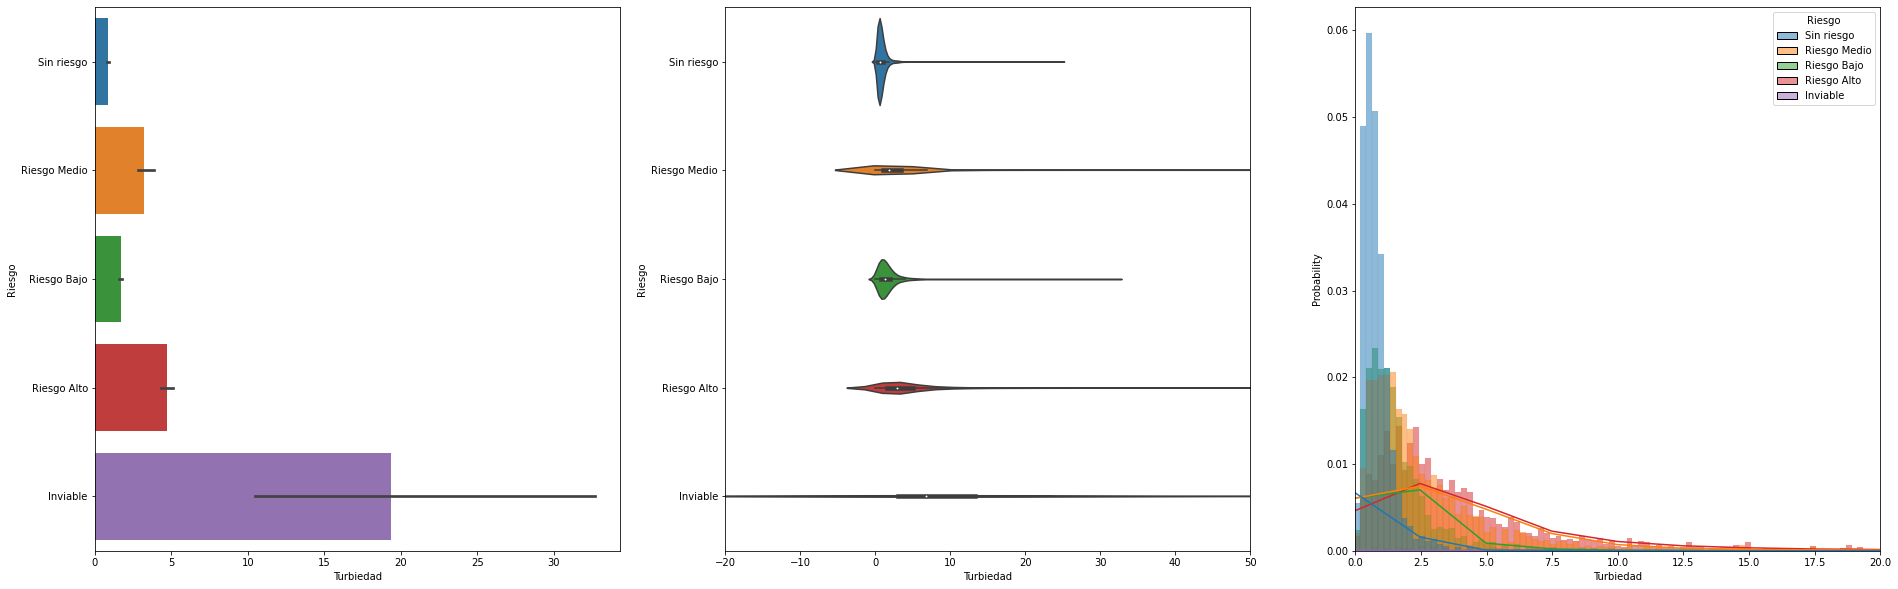

In [ ]:
#@title Análisis de la importancia de la Turbiedad en la calidad del agua
#@markdown A diferencia del color que son las sustancias mezcladas en el agua, la turbidez se refiere a la capa sólida que flota en el cuerpo hídrico, y al parecer, esta característica la hace uno de los factores más importantes a la hora de determinar el IRCA, después de todo, gráficamente se puede visualizar que altos niveles de turbidez apuntan a un riesgo extremadamente alto, esto incluso explicaría la correlación elevada que posee: 0.218.
plt.figure(figsize=(32,10))
x='Turbiedad'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dc)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dc)
g.set(xlim=(-20, 50))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dc,kde=True,stat='probability')
g.set(xlim=(0, 20))
plt.show()

## Análisis en Santander

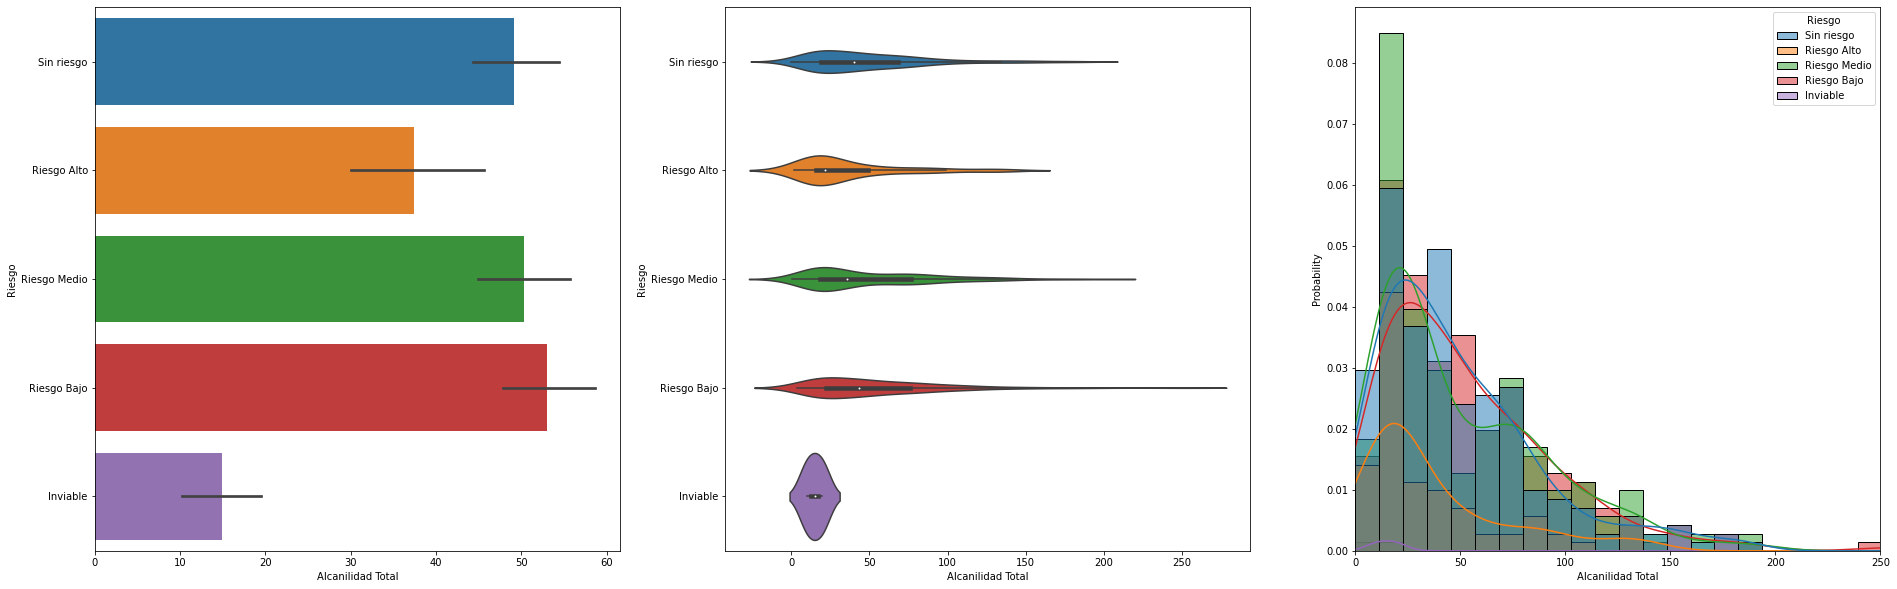

In [ ]:
#@title Análisis de la importancia de la Alcalinidad en la calidad del agua en Santander
#@markdown En las distribuciones se observa que todas tienen una media cercana entre sí, lo que dificulta la clasificación de la calidad del agua mediante la alcalinidad en el departamento de Santander, y en los violinplots se evidencia que en el caso de que el consumo de dicha agua sea inviable sanitariamente, se concentran los datos cerca a la media, cosa que no sucede en los otros tipos de riesgo. Se obtiene una correlación de -0.073, lo que indica que la alcalinidad aporta muy poca información para determinar el riesgo.
plt.figure(figsize=(32,10))
x='Alcanilidad Total'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
# g.set(xlim=(-2, 20))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 250))
plt.show()

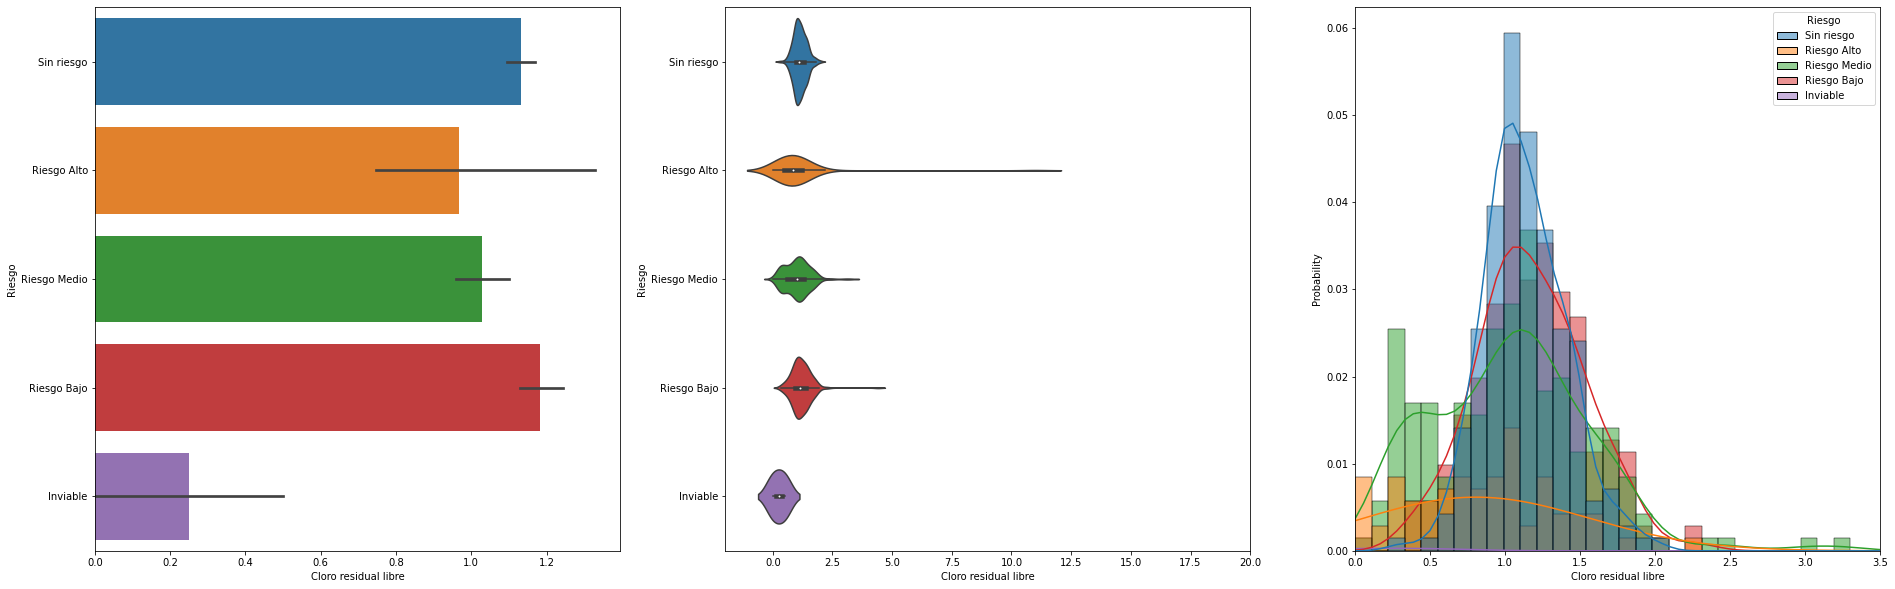

In [ ]:
#@title Análisis de la importancia del Cloro en la calidad del agua en Santander
#@markdown La media de cada tipo de riesgo tiene una distribución concentrada pero diferente, siendo la inviable la más diferenciable, la de riesgo alto tiene demasiados valores atípicos y la distribución del riesgo medio tiene dos medias. En resumen, esta característica puede ser útil para la regresión aunque como su valor es -0.123, esto indica que es inversamente proporcional.
plt.figure(figsize=(32,10))
x='Cloro residual libre'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(0, 12.5))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 3.5))
plt.show()

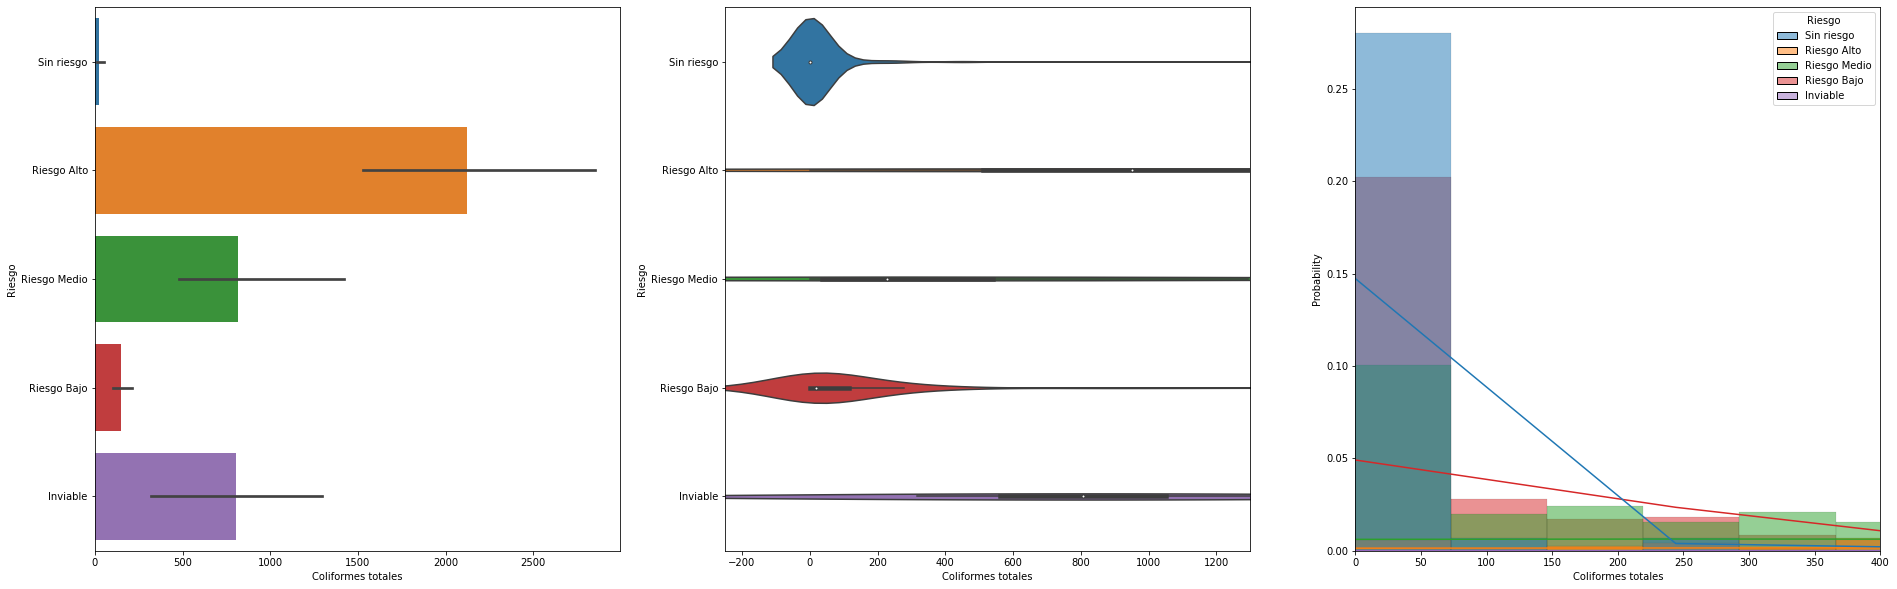

In [ ]:
#@title Análisis de la importancia de los Coliformes en la calidad del agua en Santander
#@markdown Según la información de las tablas se puede inferir que las bacterias Coliformes es un factor a tener en cuenta sobre la calidad de agua del departamento de Santander, después de todo, un alto número de dichos seres pueden llegar a generar un gran riesgo. Además, tiene una correlación de 0.315, es decir que tiene la capacidad de alterar significativamente el índice de riesgo de la calidad de agua.
plt.figure(figsize=(32,10))
x='Coliformes totales'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(-250, 1300))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 400))
plt.show()

In [ ]:
#@title Análisis de la importancia del Color aparente en la calidad del agua en Santander
#@markdown En el caso del color aparente si el riesgo es alto se observa una distribución aplanada, con valores atípicos en ambos extremos y media alta, la de riesgo inviable es mucho más concentrada y con media alta, y para riesgos menos la media es menor, por lo que con eso y la correlación con el IRCA promedio de 0.408 se evidencia su importancia al estimar el IRCA.
plt.figure(figsize=(32,10))
x='Color aparente'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(-15, 65))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 40))
plt.show()

In [ ]:
#@title Análisis de la importancia de la Dureza total en la calidad del agua en Santander
#@markdown En las tres gráficas se evidencia la cercanía entre los diferentes tipos de riesgo y con su valor de correlación de 0.097, queda claro que esta característica no es para nada útil al momento de intentar hacer la regresión en el departamento de Santander.	
plt.figure(figsize=(32,10))
x='Dureza total'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(-40, 350))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 250))
plt.show()

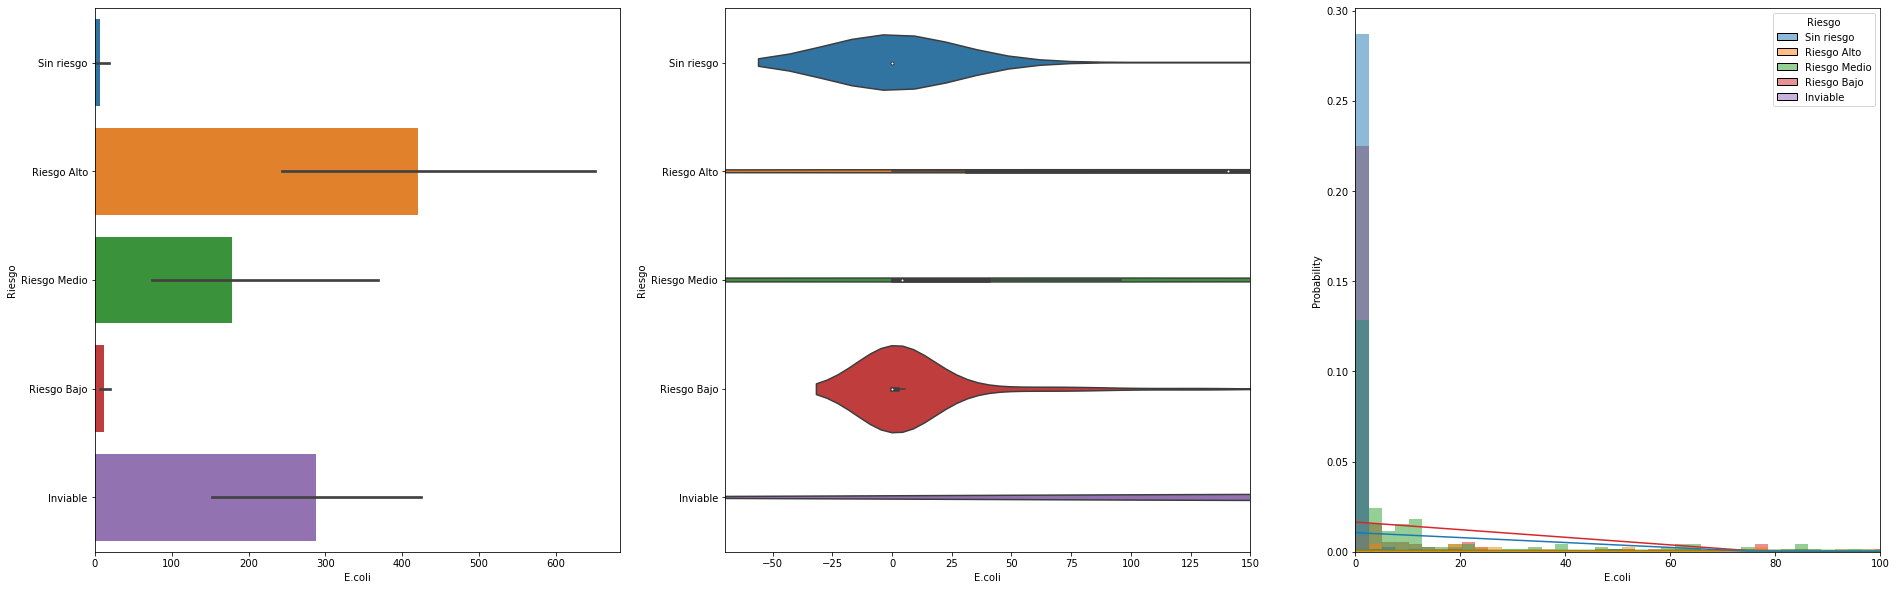

In [ ]:
#@title Análisis de la importancia del E.coli en la calidad del agua en Santander
#@markdown Las distribuciones de la tercera gráfica tienen un comportamiento discreto por lo que no son muy útiles para entender la importancia de esta característica en el departamento y en el caso de la segunda se observan distribuciones muy aplanadas para los riesgos alto, medio e inviable, pero esto mismo hace posible la diferenciación con los riesgos bajo y nulo, de allí que su correlación sea 0.226 y sea un factor determinante.
plt.figure(figsize=(32,10))
x='E.coli'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(-70, 150))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 100))
plt.show()

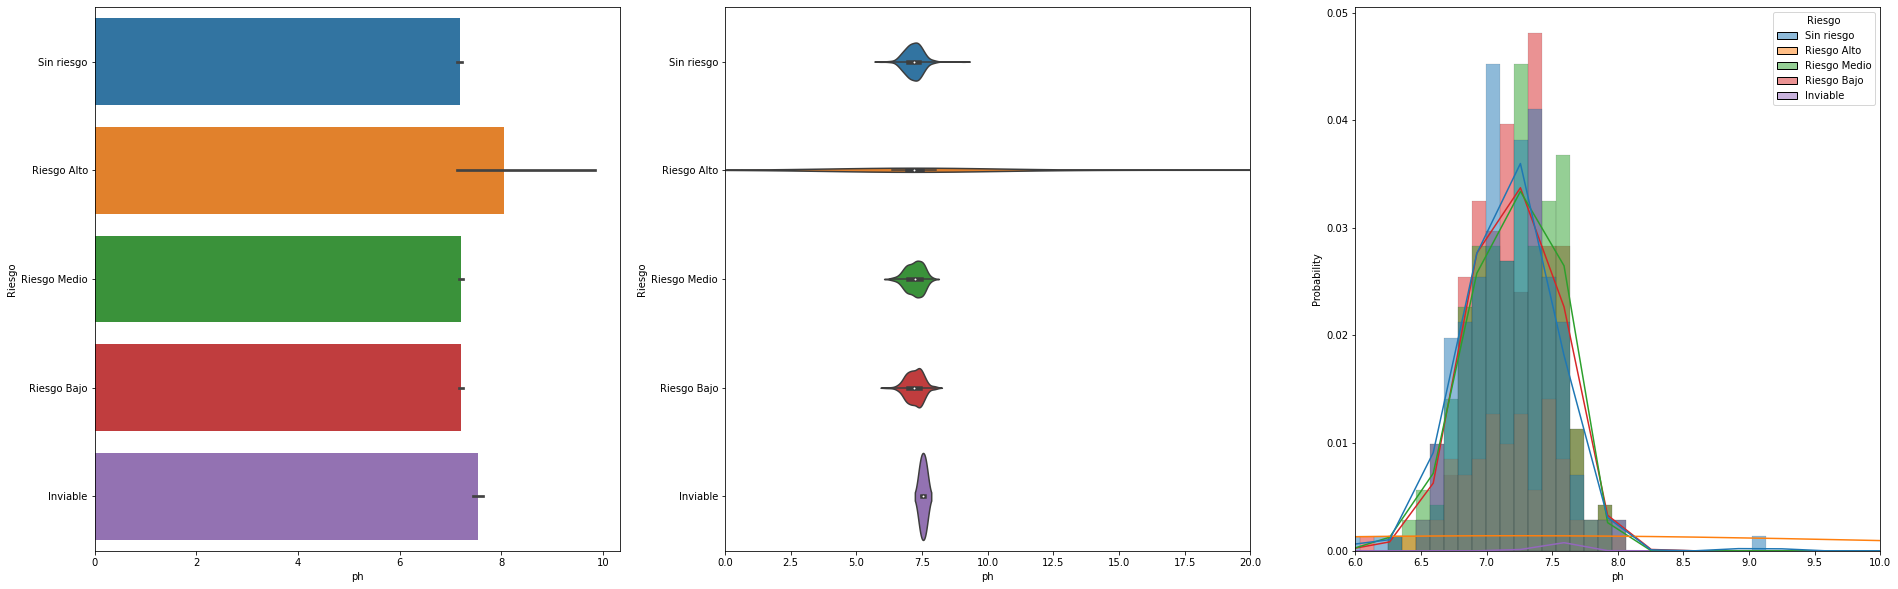

In [ ]:
#@title Análisis de la importancia del ph en la calidad del agua en Santander
#@markdown Se observa que las medias son cercanas a pesar de la variabilidad de las distribuciones, cabe resaltar la concentración del riesgo inviable sanitariamente y la de riesgo alto que tiene nula concentración cerca de su media. La correlación de 0.136 indica la baja relevancia de esta característica.
plt.figure(figsize=(32,10))
x='ph'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(0, 20))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(6, 10))
plt.show()

In [ ]:
#@title Análisis de la importancia de la turbidez en la calidad del agua en Santander
#@markdown A diferencia del color, la turbidez del agua representa aquellas particulas en suspensión y de acuerdo a las gráficas, se puede fácilmente indentificar que entre más turbia sea el agua, es más factible que su riesgo también lo sea, después de todo, cuenta con una correlación de 0.490, osea dicha variable tiene una gran importancia a la hora de determinar el IRCA.
plt.figure(figsize=(32,10))
x='Turbiedad'
plt.subplot(1,3,1), sns.barplot(x=x,y='Riesgo',data=Dcs)
plt.subplot(1,3,2)
g=sns.violinplot(x=x,y='Riesgo',data=Dcs)
g.set(xlim=(-5, 80))
plt.subplot(1,3,3)
g=sns.histplot(x=x,hue='Riesgo',data=Dcs,kde=True,stat='probability')
g.set(xlim=(0, 15))
plt.show()

## DTR

In [ ]:
#@title Train test split
# X = D.values[:,[5,6,7,8,9,10,11,12]]
X = D.values[:,[6,7,8,10,12]]
# X = dnoCeros.values[:,[6,7,8,10,12]]
y = D.values[:,[0]] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#@title Mejor DTR
regressor = DecisionTreeRegressor(
                      max_depth=8,
                      criterion='squared_error',
                      max_features="auto",
                      splitter="best"
                    )
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto')

In [ ]:
#@title Métricas DTR
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
print("Explain variance score =", explained_variance_score(y_test, regressor.predict(X_test))) 
print("R2 score =", r2_score(y_test, regressor.predict(X_test)))

MSE depth split data  84.895
RMSE depth split data  9.214
MAE depth split data  6.344
Explain variance score = 0.8042039253920167
R2 score = 0.8041439981469323


In [ ]:
#@title Cross-Validation DTR
s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(r2_score))
print ("R2 : %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

R2 : 0.821 (+/- 0.01409)


## RFR

In [ ]:
#@title RandomForestRegressor
N_ESTIMATORS=[50,100,150,200,250,300]
CRITERION=['squared_error','absolute_error','poisson']
MAX_DEPTH=[10,15,20,25,30]
max_features = ['auto', 'sqrt', 'log2']
acc=[]
for dpth in MAX_DEPTH:
  for ne in N_ESTIMATORS:
    for criterio in CRITERION:
      for maxf in max_features:
        est=RandomForestRegressor(
            max_depth=dpth,
            n_estimators=ne,
            criterion=criterio,
            max_features=maxf
            )
        est.fit(X_train,np.array(y_train.ravel()))
        acc.append([dpth,ne,criterio,maxf,r2_score(y_test, est.predict(X_test)),explained_variance_score(y_test, est.predict(X_test))])
  print("fin")
params = pd.DataFrame(acc, columns=["Deepth","Estimators","Criterion","maxf","R2","EVS"])

print("\nmejores parametros para el RFR\n")
print(params.loc[[params["R2"].idxmax()]])



In [ ]:
#@title Mejor RFR
RFR = RandomForestRegressor(
              max_depth=15,
              n_estimators=200,
              criterion="squared_error",
              max_features="log2"
            )
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=200)

In [ ]:
#@title Métricas RFR
print("MSE: %.3f"% mean_squared_error(y_test, RFR.predict(X_test)))
print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, RFR.predict(X_test))))
print("MAE: %.3f"% mean_absolute_error(y_test, RFR.predict(X_test)))
print("Explain variance: ", explained_variance_score(y_test, RFR.predict(X_test))) 
print("R2: ", r2_score(y_test, RFR.predict(X_test)))

MSE: 58.940
RMSE: 7.677
MAE: 5.307
Explain variance:  0.8640727233492471
R2:  0.8640244585237455


In [ ]:
#@title Cross-Validation RFR
s = cross_val_score(RFR, X, np.array(y.ravel()), cv=KFold(10, shuffle=True), scoring=make_scorer(r2_score))
print ("R2 : %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

R2 : 0.862 (+/- 0.01512)


In [ ]:
RFR.feature_importances_

array([0.36279797, 0.18168214, 0.09804413, 0.28217483, 0.07530094])